# Case Study

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition

In [2]:
#Help funcs for colored output
from termcolor import colored, cprint
def green(txt):
    return colored(txt, 'green')
def red(txt):
    return colored(txt, 'red')
def blue(txt):
    return colored(txt, 'cyan')
def bold(txt):
    return colored(txt, attrs=['bold'])

In [195]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index and id
df = df.iloc[:, 2:]

## Visualisierung 1.0

In [13]:
df.describe()

price      bedrooms    bathrooms   sqft_living      sqft_lot  \
count  1.500000e+04  15000.000000  15000.00000  15000.000000  1.500000e+04   
mean   3.328097e+06      3.372400      2.12635   2096.708267  1.469860e+04   
std    1.643430e+07      0.902832      0.76925    984.417205  3.842964e+04   
min    1.000000e+04      0.000000      0.00000    370.000000  5.200000e+02   
25%    3.180000e+05      3.000000      1.75000   1430.000000  5.000000e+03   
50%    4.517775e+05      3.000000      2.25000   1920.000000  7.566000e+03   
75%    6.600000e+05      4.000000      2.50000   2570.000000  1.068575e+04   
max    1.000000e+08     11.000000      8.00000  17180.000000  1.164794e+06   

             floors    waterfront     dis_super          view     condition  \
count  15000.000000  14997.000000  14997.000000  14997.000000  14997.000000   
mean       1.509533      0.006801    937.559056      0.227646      3.395279   
std        0.545462      0.082192    268.828882      0.755120      0.642622   
min        1.000000      0.000000     93.000000      0.000000      1.000000   
25%        1.000000      0.000000    757.720000      0.000000      3.000000   
50%        1.500000      0.000000    936.580000      0.000000      3.000000   
75%        2.000000      0.000000   1116.120000      0.000000      4.000000   
max        3.500000      1.000000   1919.340000      4.000000      5.000000   

       ...      yr_built  yr_renovated       zipcode           lat  \
count  ...  14997.000000  15000.000000  15000.000000  15000.000000   
mean   ...   1972.397546     77.436533  98076.245733     47.554242   
std    ...     29.545072    385.447294     53.580436      0.140877   
min    ...   1900.000000      0.000000  98001.000000     47.155900   
25%    ...   1953.000000      0.000000  98031.000000     47.458500   
50%    ...   1977.000000      0.000000  98065.000000     47.566950   
75%    ...   1999.000000      0.000000  98117.000000     47.675325   
max    ...   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15          ahf1          ahf2  \
count  15000.000000   15000.000000   15000.000000  15000.000000  15000.000000   
mean    -122.213894    1991.374400   12566.263467     48.617462    104.143663   
std        0.139778     692.536001   26827.490013     22.174254     13.005133   
min     -122.515000     399.000000     651.000000     10.010585     55.397985   
25%     -122.326000    1480.000000    5040.000000     29.262797     95.316786   
50%     -122.234000    1840.000000    7601.000000     48.557508    104.253927   
75%     -122.126000    2380.000000   10050.000000     67.847538    112.975883   
max     -121.321000    6210.000000  871200.000000     86.999842    157.639420   

               ahf3  
count  15000.000000  
mean     152.761125  
std       25.724786  
min       75.072384  
25%      132.916027  
50%      152.870930  
75%      172.439485  
max      229.276426  

[8 rows x 23 columns]

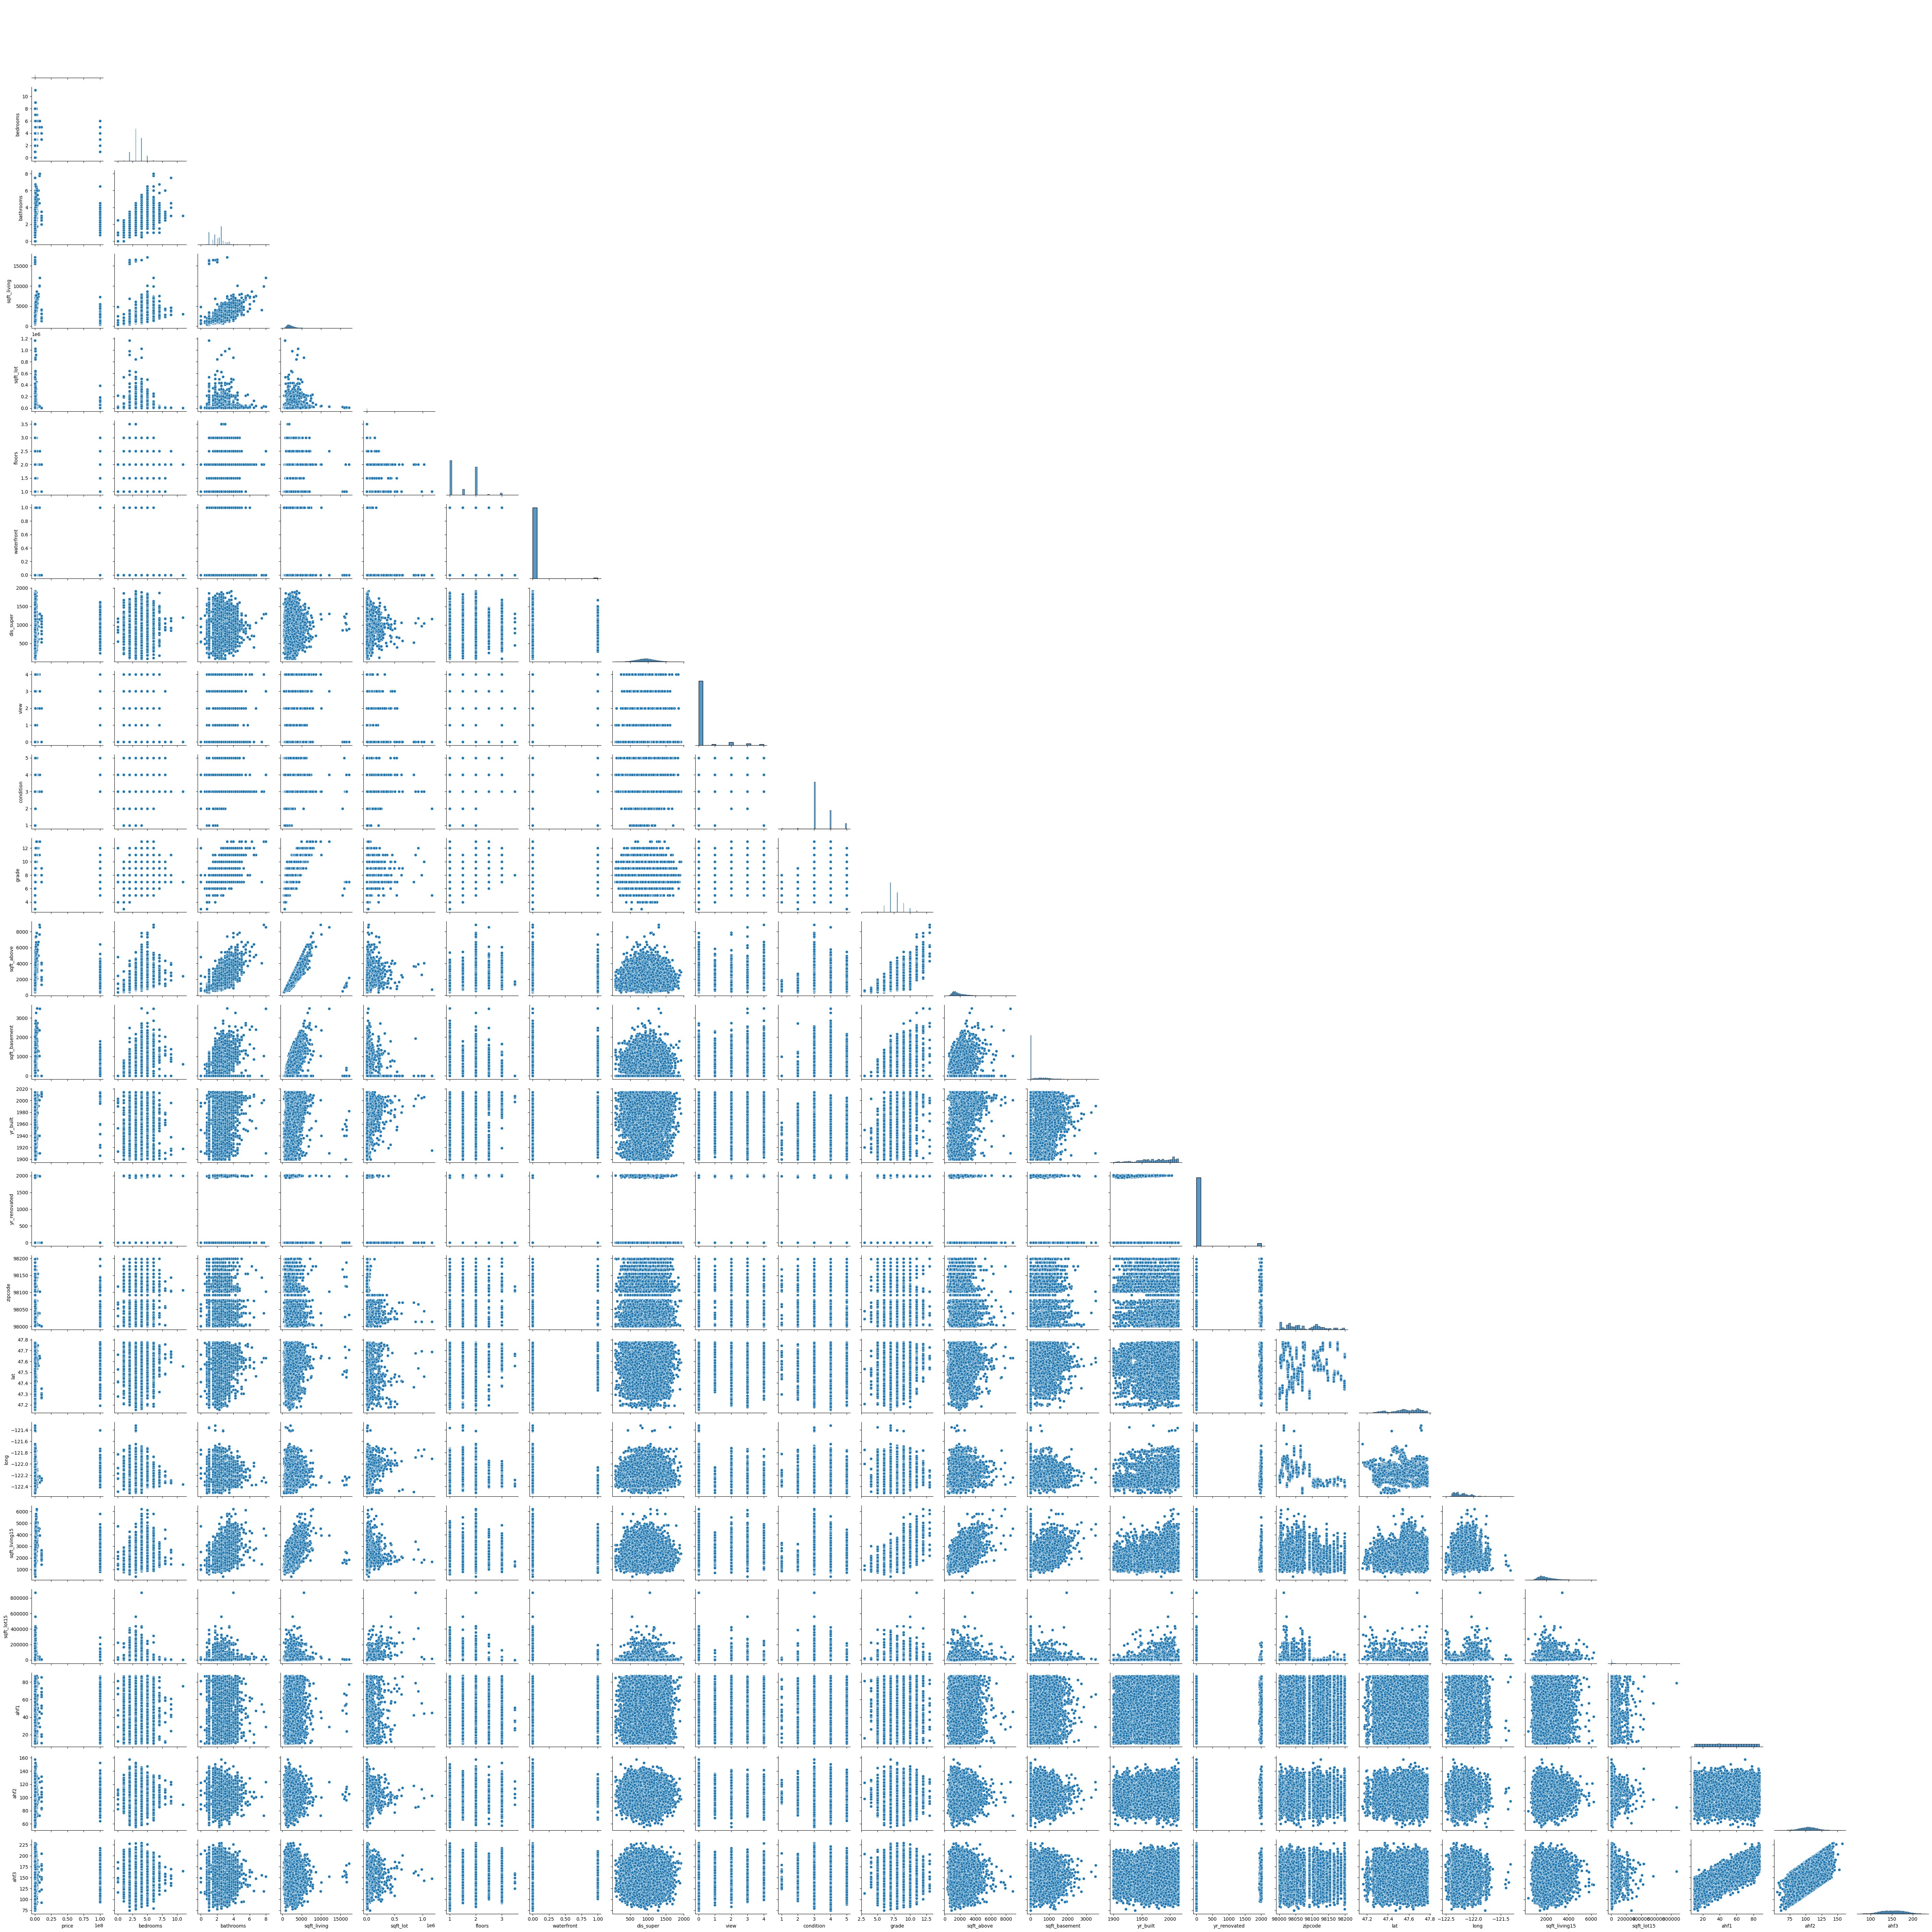

In [14]:
sns.pairplot(df, 
    #x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    #y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

### Geographische Lage

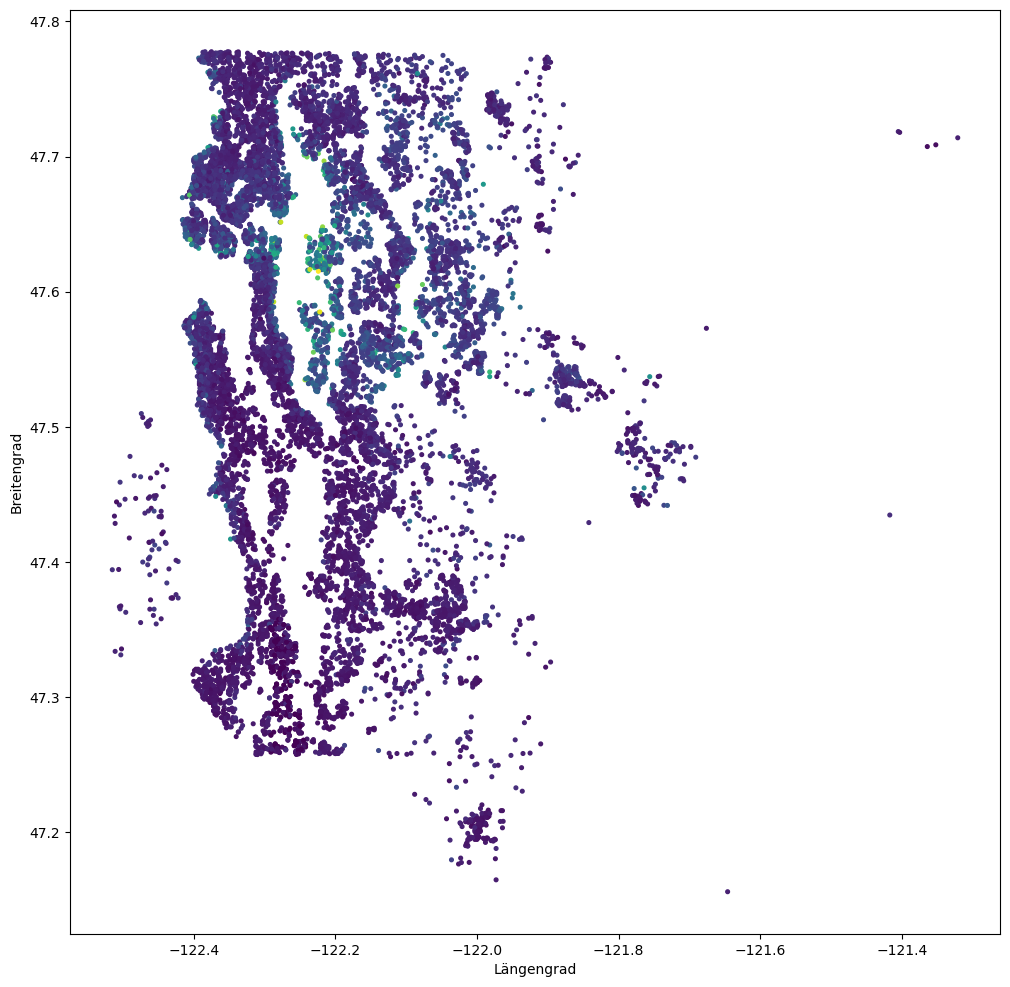

In [150]:
# Color verbessern, aber sehr gute visualisierung
plt.figure(figsize=(12,12))
plt.scatter(df["long"], df["lat"], c=df["price"], s=7)
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.show()

### Label & Features

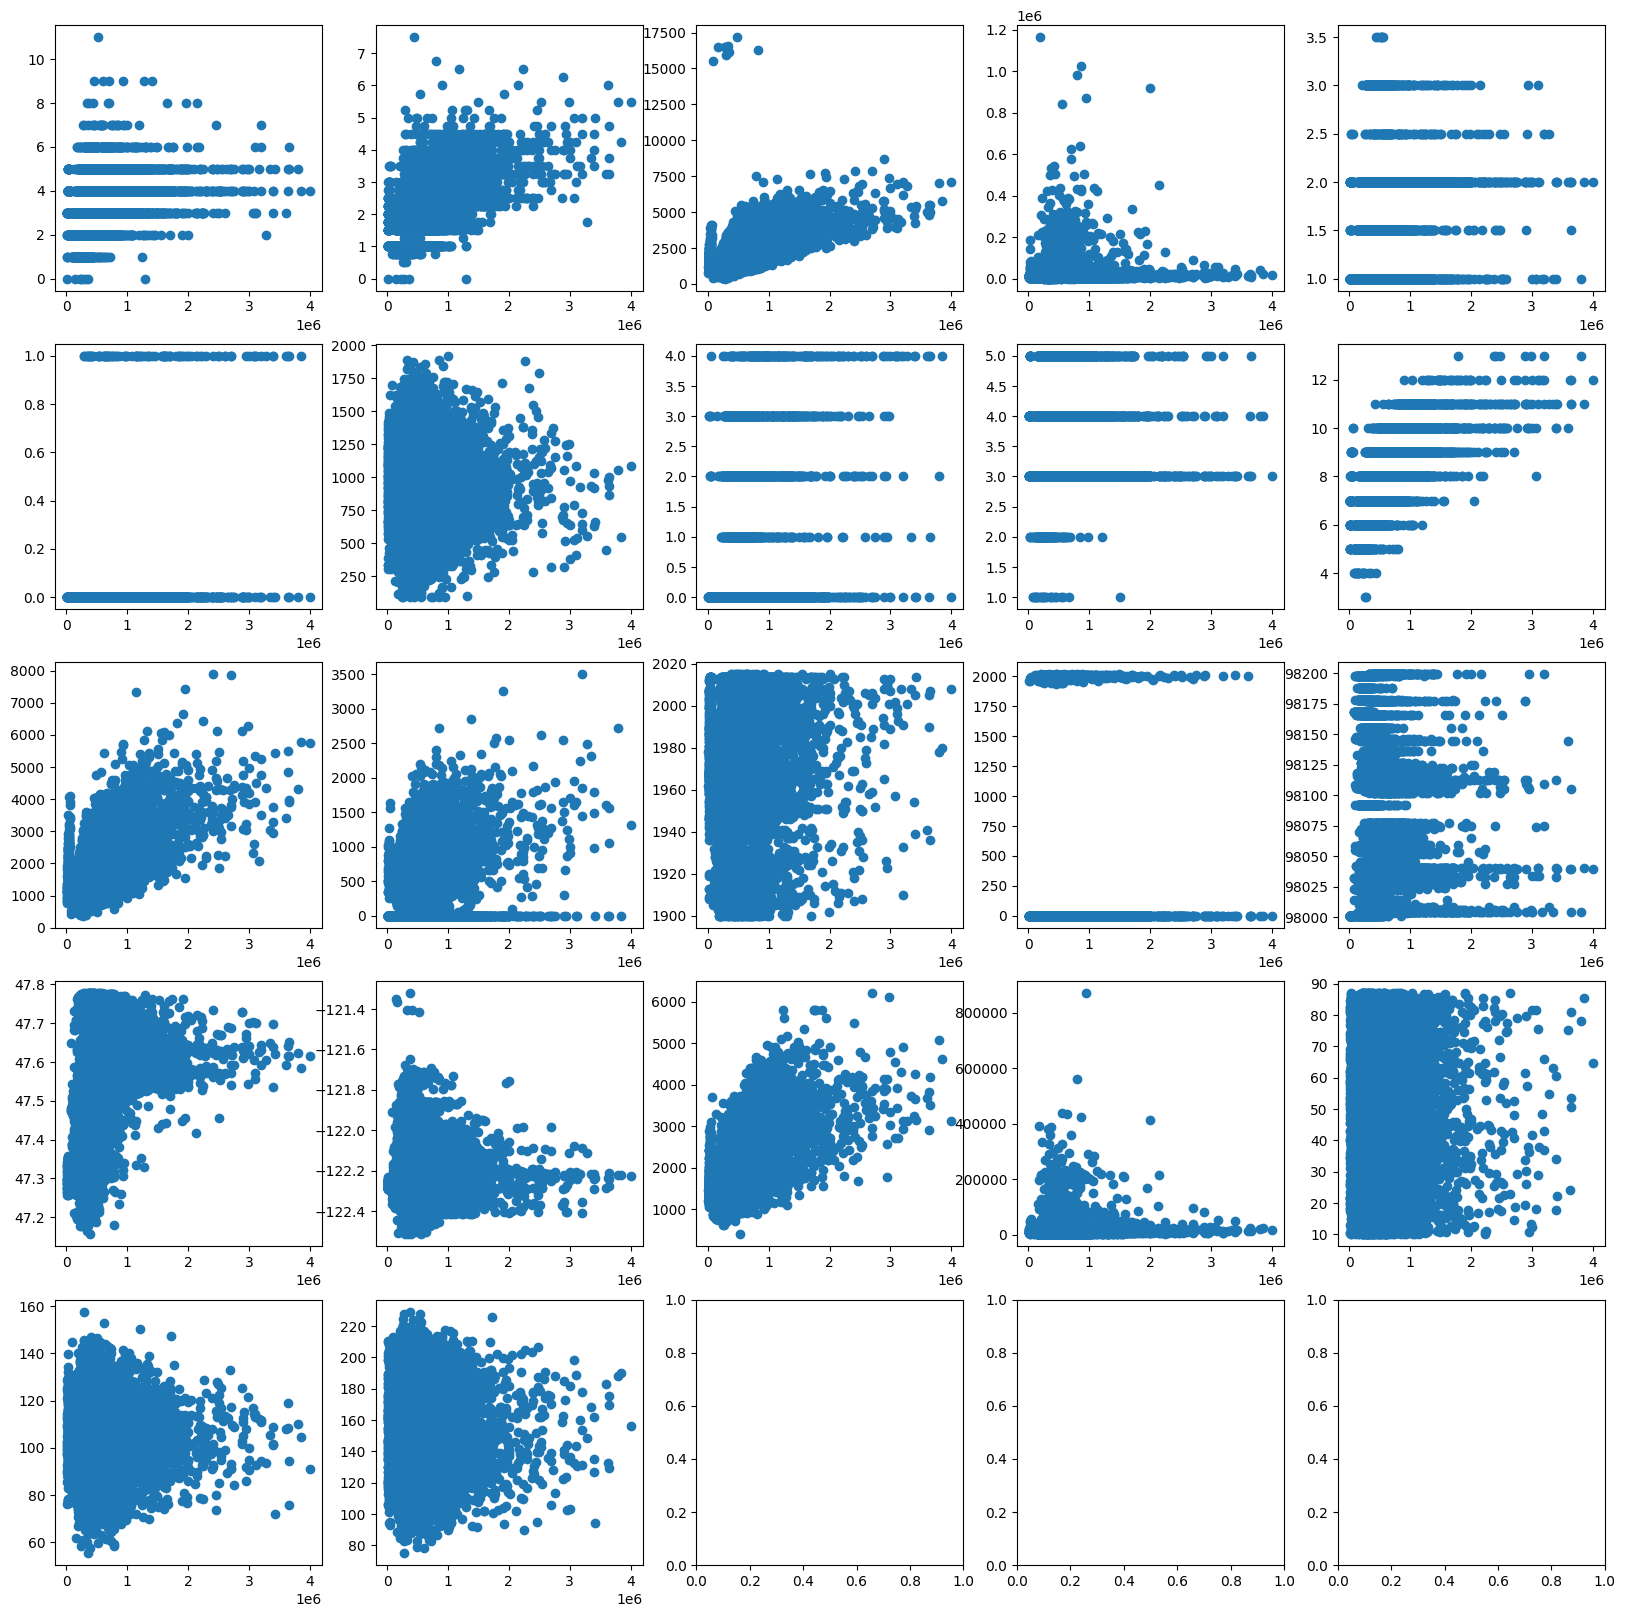

In [151]:
#Anzeige verbessern + Legenden
fig, axs=plt.subplots(5,5, figsize=(20,20))
for i,ax in zip(df.iloc[:,2:],axs.ravel()):
    ax.scatter(df["price"],df[i])

### Quadratmeter

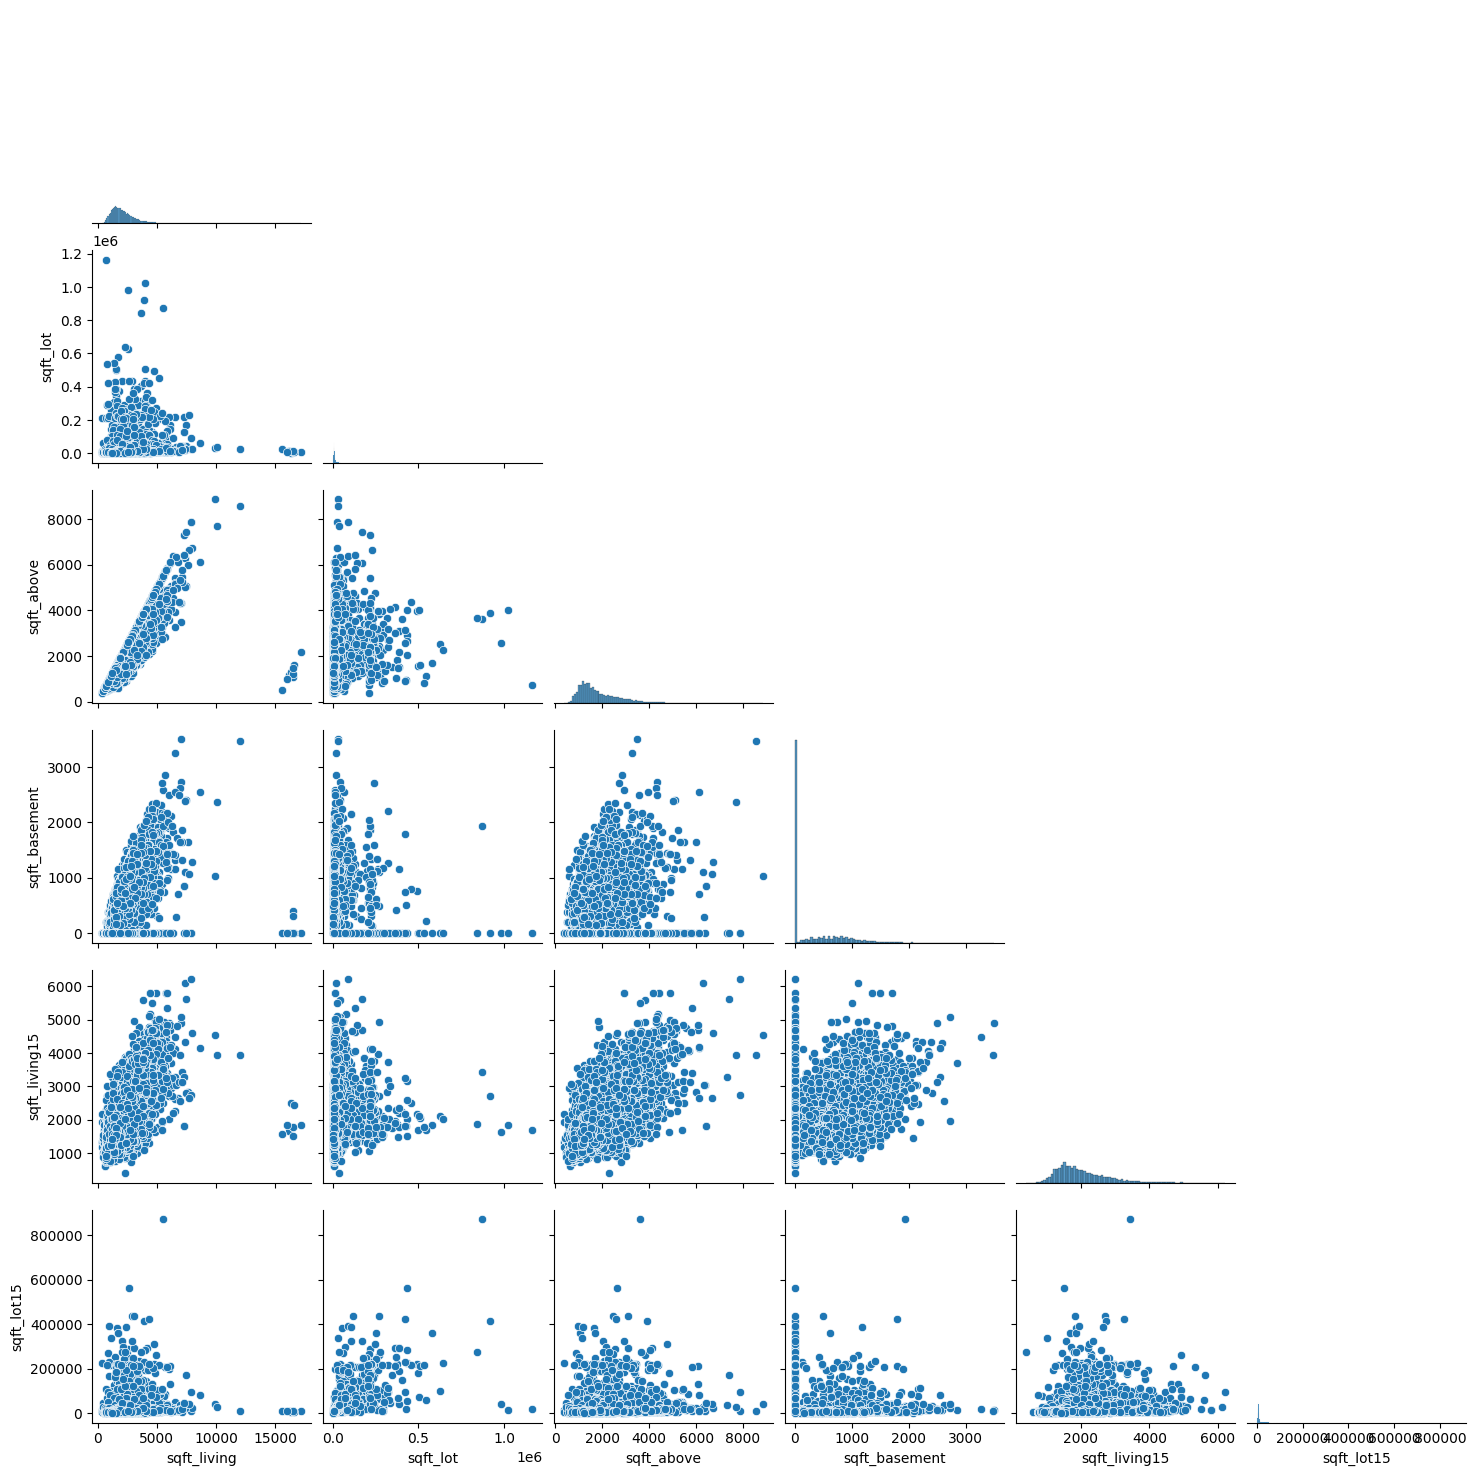

In [17]:
#Keine relevanten Erkenntnisse!? Rausnehmen?
all_sqft_features=['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15','sqft_lot15']
sns.pairplot(df, x_vars=all_sqft_features, y_vars=all_sqft_features, corner=True)

## Ausreißer

### Manuelle Betrachtung

Der Preis ist sehr auffällig:


<AxesSubplot:>

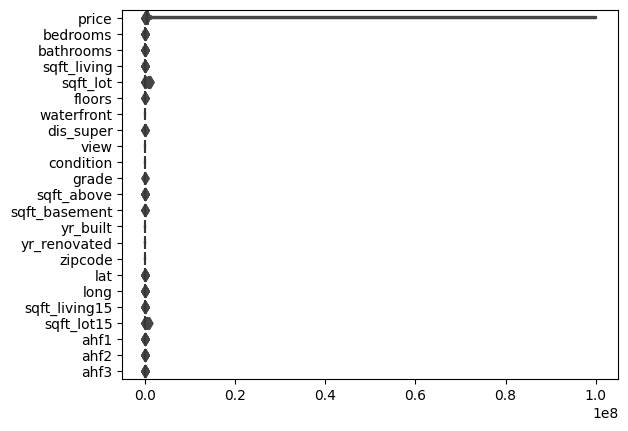

In [18]:
#Visuallisierung von Ausreißern
print("Der Preis ist sehr auffällig:")
sns.boxenplot(data=df,orient="h")

In [196]:
print("Die kleinsten zehn Werte des Features price:")
print(np.sort(df.price.unique())[:10],"\n")

print("Die größten zehn Werte des Features price:")
print(np.sort(df.price.unique())[-10:],"\n")

print("Anzahl Ausreißer mit 99 Millionen: " + str(len(df.loc[df.price == 99999999.0])))
print("Anzahl Ausreißer mit 9 Millionen: " + str(len(df.loc[df.price == 9999999.9])))

df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

Die kleinsten zehn Werte des Features price:
[10000. 11500. 12450. 13250. 13900. 13995. 15000. 15400. 15900. 16000.] 

Die größten zehn Werte des Features price:
[ 3850000.   4000000.   4500000.   5300000.   5350000.   6885000.
  7062500.   7700000.   9999999.9 99999999. ] 

Anzahl Ausreißer mit 99 Millionen: 421
Anzahl Ausreißer mit 9 Millionen: 11


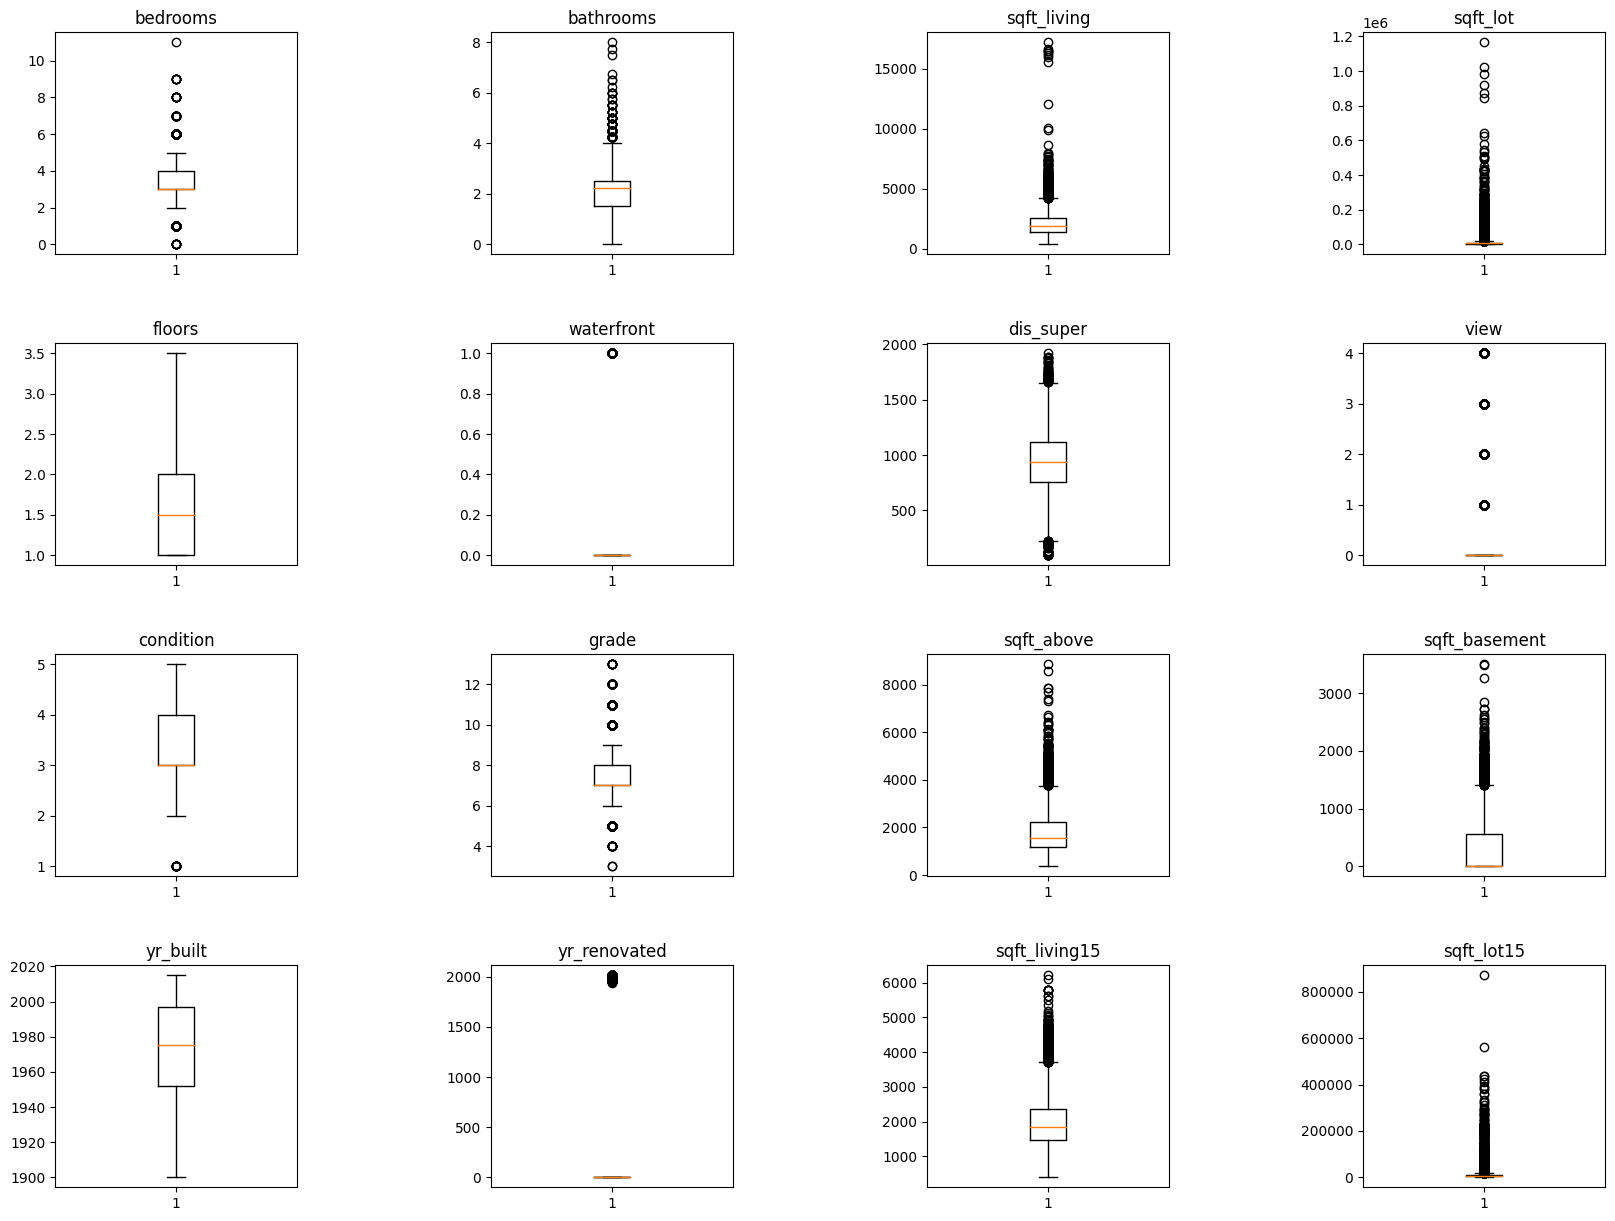

In [20]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df.dropna()[i])
    ax[x].set_title(i)
    x+=1

In [21]:
for i in df.columns:
    all = len(df)
    modus = len(df.loc[df[i] == df[i].mode()[0]])
    percentage = round(modus / all, 4) * 100
    if percentage > 5 and df[i].mode()[0] == 0:
        print(f"{i}:  \n    Der Wert 0 macht {percentage}% aller Werte aus")

waterfront:  
    Der Wert 0 macht 99.29% aller Werte aus
view:  
    Der Wert 0 macht 90.32% aller Werte aus
sqft_basement:  
    Der Wert 0 macht 61.24000000000001% aller Werte aus
yr_renovated:  
    Der Wert 0 macht 96.0% aller Werte aus


Die vier Featurs **waterfront**, **view**, **sqft_basement** und **yr_renovated** enthalten auffällig oft den Wert 0.
  
- Bei **view** könnte der Wert teil der Skala sein.  
- Im Fall von **sqft_basement** würde 0 vermutlich keinen Keller bedeuten.  
- Für **yr_renovated** stellt die 0 einen unrealistischen Wert dar. Sie könnte dennoch eine Information enthalten.  
- **waterfront** hat nur die Werte 0 und 1. Diese Werte wohl für Wahrheitswerte, sprich ob ein Haus eine Wasserfront hat oder nicht. Das würde die 99.31% 0 erklären.  
  
Auch bei **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.
  
*Anmerkung: der folgende Teil wurde erst nach der Entfernung der Ausreißer beim Preis ausgeführt*  

##### **view:**
Obwohl die Wertung 0 im Feature **view** unüblich oft auftaucht, scheint sie nicht weiter ungewöhnlich zu sein.  
Der durchschnittliche Preis steigt einigermaßen gleichmäßig von 0 bis 5 an, wie der Barplot weiter unten aufzeigt

<AxesSubplot:xlabel='view', ylabel='price'>

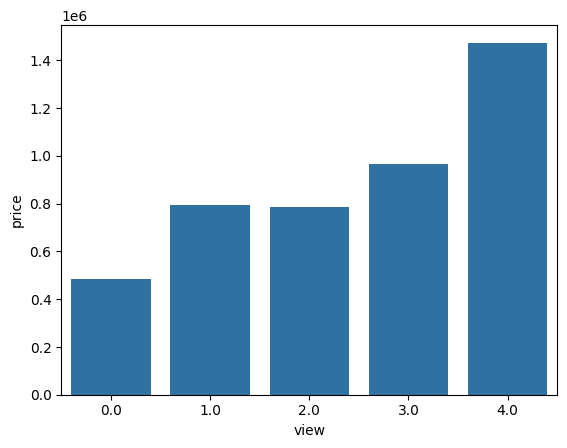

In [22]:
view_df = df.loc[:, ["view", "price"]].groupby("view").mean()
sns.barplot(x=view_df.index, y=view_df.price, color="#1c74b4")

##### **waterfront:**
Die Gebäude mit **waterfront** = 1 sind deutlich mehr Wert. Die 0 steht anscheinend wirklich für keine Wasserfront.

In [23]:
print("Werte in df.waterfront:",df.waterfront.unique())

waterfront_0 = round(df.loc[df.waterfront == 0].price.mean(), 2)
waterfont_1 = round(df.loc[df.waterfront != 0].price.mean(), 2)
difference = round((waterfont_1 / waterfront_0 - 1) * 100, 2) 

print(f"Der durchschnittliche Preis bei waterfront = 0: {waterfront_0}\nDer durchschnittliche Preis bei waterfront = 1: {waterfont_1}\nDas sind etwa {difference}% mehr.")

Werte in df.waterfront: [ 0.  1. nan]
Der durchschnittliche Preis bei waterfront = 0: 521284.7
Der durchschnittliche Preis bei waterfront = 1: 1649895.12
Das sind etwa 216.51% mehr.


##### **sqft_basement:**

Der Wert 0 bei **sqft_basement** senkt den Durchschnittspreis etwas im Vergleich zu anderen Werten.  
Insgesamt scheint er aber nicht aus dem Rahmen zu fallen.

<AxesSubplot:>

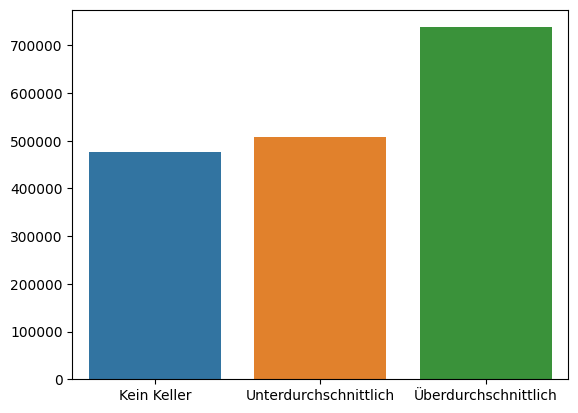

In [24]:
sqft_basement_0 = round(df.loc[df.sqft_basement == 0].price.mean(), 2)
mean = df.loc[df.sqft_basement != 0].sqft_basement.mean()
sqft_basement_below_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement < mean)].price.mean(), 2)
sqft_basement_above_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement > mean)].price.mean(), 2)

sns.barplot(x=["Kein Keller","Unterdurchschnittlich", "Überdurchschnittlich"], y=[sqft_basement_0,sqft_basement_below_mean,sqft_basement_above_mean])

##### **yr_renovated:**
Wie durch den Codeblock dargestellt, ist der durchschnittliche Preis von Gebäuden mit Renovierungsdatum deutlich höher.  
Eine mögliche Erklärung wäre, dass die 0 bei **yr_renovated** bedeutet, dass das Gebäude noch nicht renoviert wurde.  
Sicher ist dabei, dass der Wert 0 eine Auswirkung auf den Preis hat. Daher muss diese Information erhalten bleiben.

In [25]:
no_renovated_mean = round(df.loc[df.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df.loc[df.yr_renovated != 0].price.mean(), 2)
difference = round((renovated_mean / no_renovated_mean - 1) * 100, 2) 

print(f"Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: {no_renovated_mean}\nDer durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: {renovated_mean}\nDas sind etwa {difference}% mehr.")

Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: 520098.8
Der durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: 751459.07
Das sind etwa 44.48% mehr.


### Z-Score

Erst mit einem ungewöhlichen hohen Z-Score Limit von 10 scheint die Ausreißererkennung brauchbare Werte zu erzeugen.  
Wie weiter unten zu sehen, werden auf diese Weise 6 Ausreißer entfernt.

Es wurden 6 Ausreißer gefunden. Sie sind auf den Graphen gelb dargestellt.
Für die weiteren untersuchungen wurden sie entfernt.


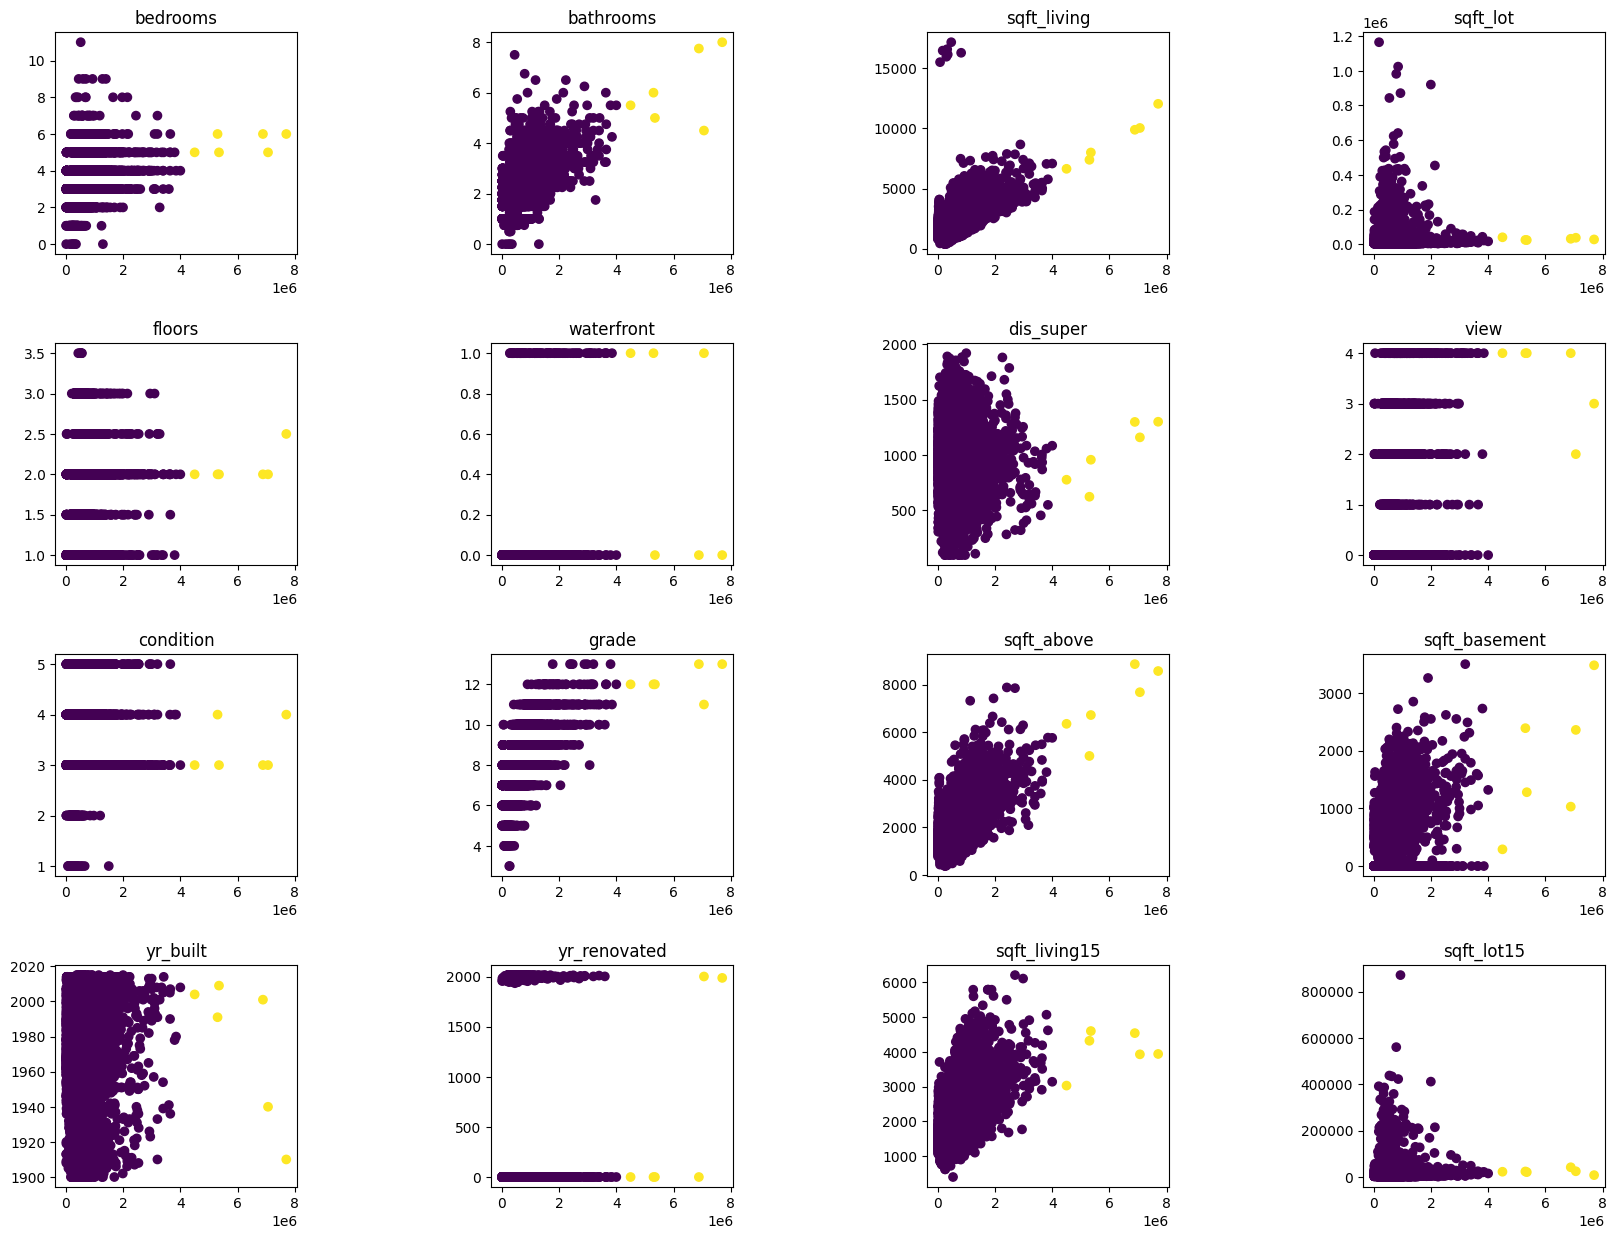

In [149]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

df1 = df.dropna()

x=0
outlier_indice = []
for i in re_col:
       z_score_mask = df1.assign(outlier = np.logical_or(df1["price"] > df1["price"].mean() + df1["price"].std() * 10, df1["price"] < df1["price"].mean() - df1["price"].std() * 10)).outlier
       for e in z_score_mask[z_score_mask == True].index:
              if e not in outlier_indice:
                     outlier_indice.append(e)

       ax[x].scatter(df1["price"],df1[i],c=z_score_mask)
       ax[x].set_title(i)
       x+=1

print(f"Es wurden {len(outlier_indice)} Ausreißer gefunden. Sie sind auf den Graphen gelb dargestellt.\nFür die weiteren untersuchungen wurden sie entfernt.")
df = df.drop(index=outlier_indice)

## Missing Values

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'dis_super', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'ahf1', 'ahf2', 'ahf3',
       'outlier'],
      dtype='object')

In [27]:
print(f'Folgende {red(len(df[df.isnull().any(axis=1)]))} Zeilen haben ausgewiesene MV')
df[df.isnull().any(axis=1)]

Folgende 3 Zeilen haben ausgewiesene MV


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
7163   20140909T000000  405000.0         3       1.75         1760      5355   
10957  20150107T000000  406000.0         2       1.00          880      3000   
14780  20141107T000000  655000.0         3       1.00         1270      3600   

       floors  waterfront  dis_super  view  ...  yr_built  yr_renovated  \
7163      1.0         NaN        NaN   NaN  ...       NaN             0   
10957     1.0         NaN        NaN   NaN  ...       NaN             0   
14780     1.5         NaN        NaN   NaN  ...       NaN             0   

       zipcode      lat     long  sqft_living15  sqft_lot15       ahf1  \
7163     98118  47.5368 -122.267           1790        6225  13.843391   
10957    98115  47.6749 -122.323            890        3000  50.170114   
14780    98119  47.6368 -122.370           1710        3600  56.035650   

             ahf2        ahf3  
7163   109.343999  123.187390  
10957  102.588214  152.758329  
14780  121.245433  177.281083  

[3 rows x 24 columns]

In [25]:
#Löschen aller Zeilen mit MV
df=df.dropna()

## Noise

## Transformation

### A) Datum

In [154]:
df["date"] = pd.to_datetime(df["date"])
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-07-08   336000.0         4       2.50         2530      8169     2.0   
1 2014-05-27  1600000.0         3       3.25         3790     19000     2.0   
2 2015-04-17   460000.0         4       1.75         1870      8663     1.0   
3 2015-01-07   998500.0         3       1.75         2140      4800     2.0   
4 2014-07-14   745000.0         3       2.75         3010     12432     1.0   

   waterfront  dis_super  view  ...  yr_built  yr_renovated  zipcode      lat  \
0         0.0     562.16   0.0  ...    1993.0             0    98003  47.2634   
1         0.0    1462.74   4.0  ...    1985.0             0    98177  47.7240   
2         0.0     599.53   0.0  ...    1949.0             0    98133  47.7366   
3         0.0     970.84   0.0  ...    1905.0             0    98112  47.6311   
4         0.0    1157.55   0.0  ...    1970.0             0    98052  47.6392   

      long  sqft_living15  sqft_lot15       ahf1        ahf2        ahf3  
0 -122.312           2220        8013  24.658459  108.183999  132.842458  
1 -122.373           2740       18628  18.682061   83.213016  101.895077  
2 -122.350           1560        7800  75.078050  101.082827  176.160876  
3 -122.312           2440        4800  49.367640   97.749706  147.117347  
4 -122.108           2500       12432  43.343635   98.282451  141.626086  

[5 rows x 24 columns]

### B) Renovierung

In [155]:
renovated_yn= []
last_renovated=[]
df["year_sold"]=pd.DatetimeIndex(df['date']).year

for i in df.index:
    if df["yr_renovated"][i] != 0:
        renovated_yn.append(1)
        last_renovated.append(df["year_sold"][i]-df["yr_renovated"][i])
    else:
        renovated_yn.append(0)
        last_renovated.append(df["year_sold"][i]-df["yr_built"][i])

del df["year_sold"]
df["renovated_yn"] = renovated_yn
df["last_renovated"] = last_renovated
df.iloc[:,-2:]

renovated_yn  last_renovated
0                 0            21.0
1                 0            29.0
2                 0            66.0
3                 0           110.0
4                 0            44.0
...             ...             ...
14995             0           101.0
14996             0            20.0
14997             0            24.0
14998             0            11.0
14999             0            25.0

[14568 rows x 2 columns]

### C) Waterfront

In [156]:
df["waterfront"].value_counts()

0.0    14464
1.0      101
Name: waterfront, dtype: int64

### D) sqft_basement

In [157]:
df['sqft_basement'].describe()

count    14565.000000
mean       288.916650
std        441.085331
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       3500.000000
Name: sqft_basement, dtype: float64

### E) Data Type

### Normalisierung

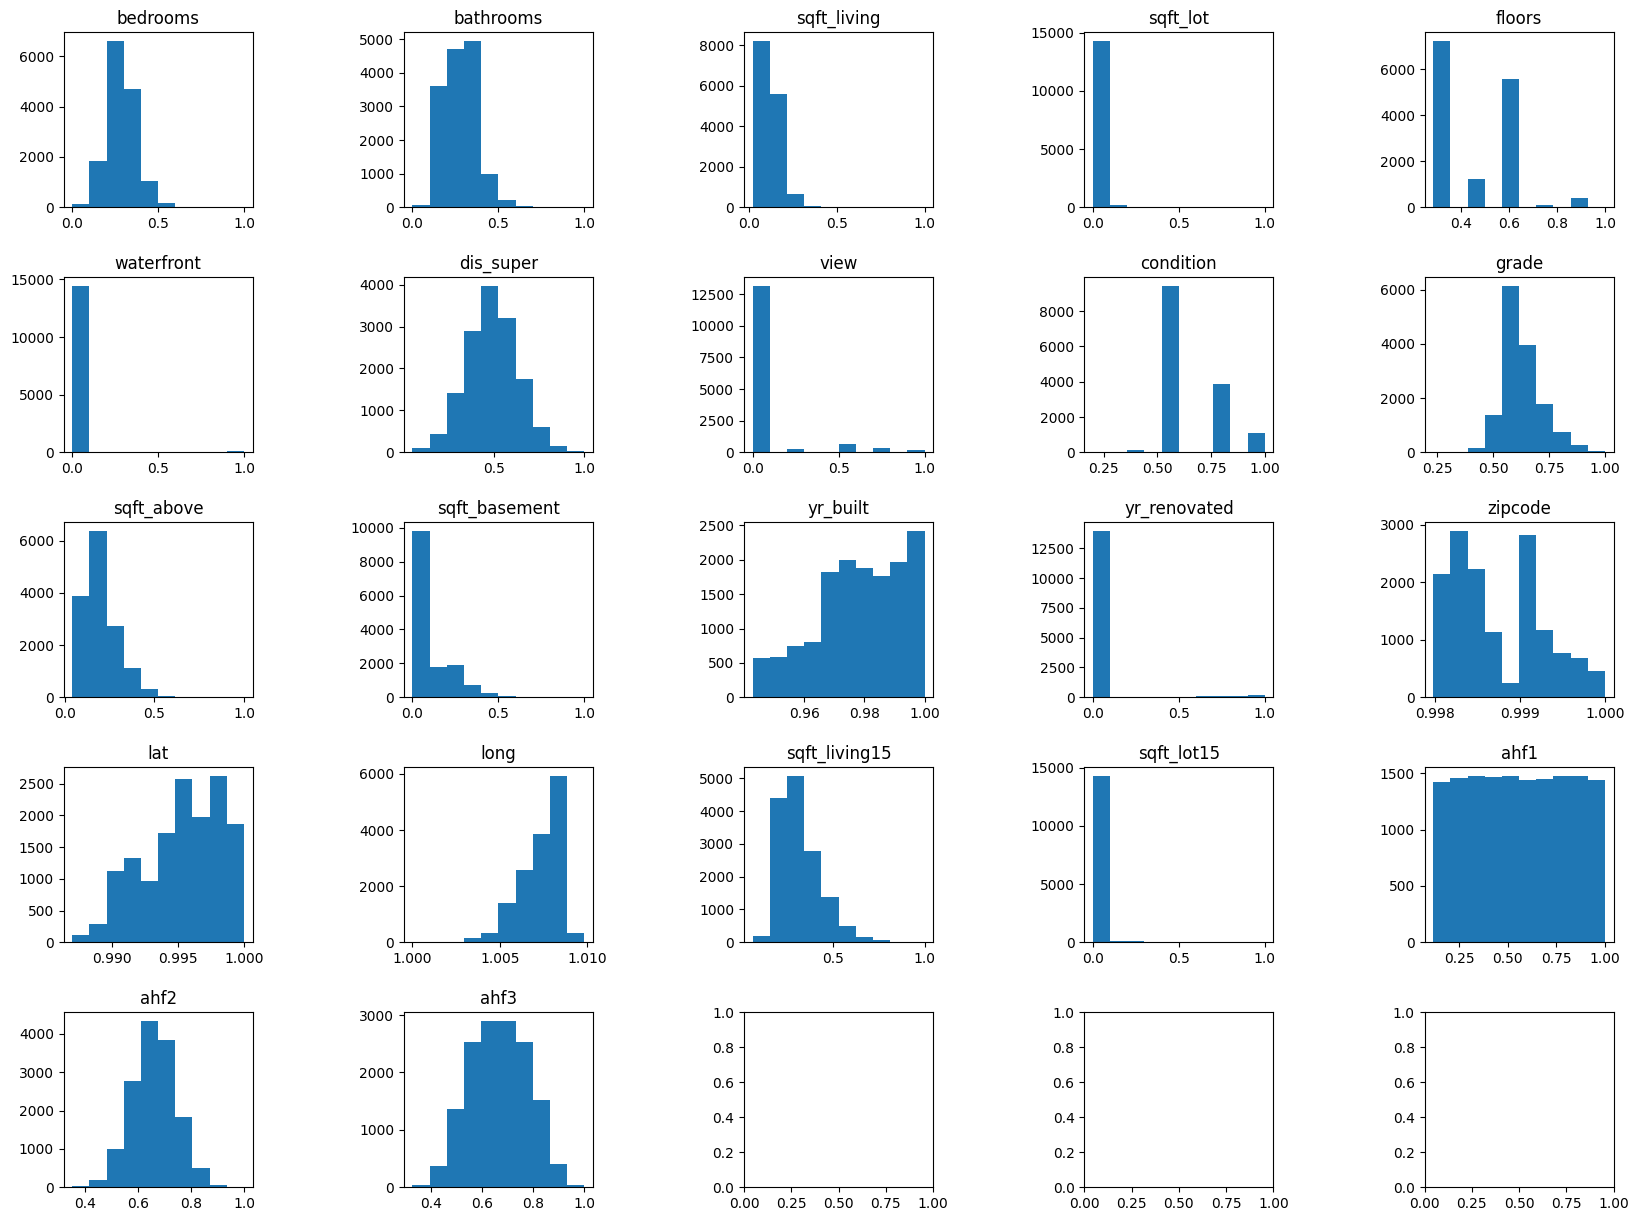

In [202]:
fig, ax = plt.subplots(5,5, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()
df1 = df.dropna().drop(columns=["price", "date"])
min_renovation = np.sort(df1.yr_renovated.unique())[1]

df1.yr_renovated = df1.yr_renovated.apply(lambda x: x if x == 0 else x - min_renovation + 1)

x=0
for i in df1.columns:
    data = df1[i]
    data = data / data.max()
    ax[x].hist(data)
    ax[x].set_title(i)
    x+=1

### Standardisierung

## Korrelation

### A) Korrelationen zum Preis

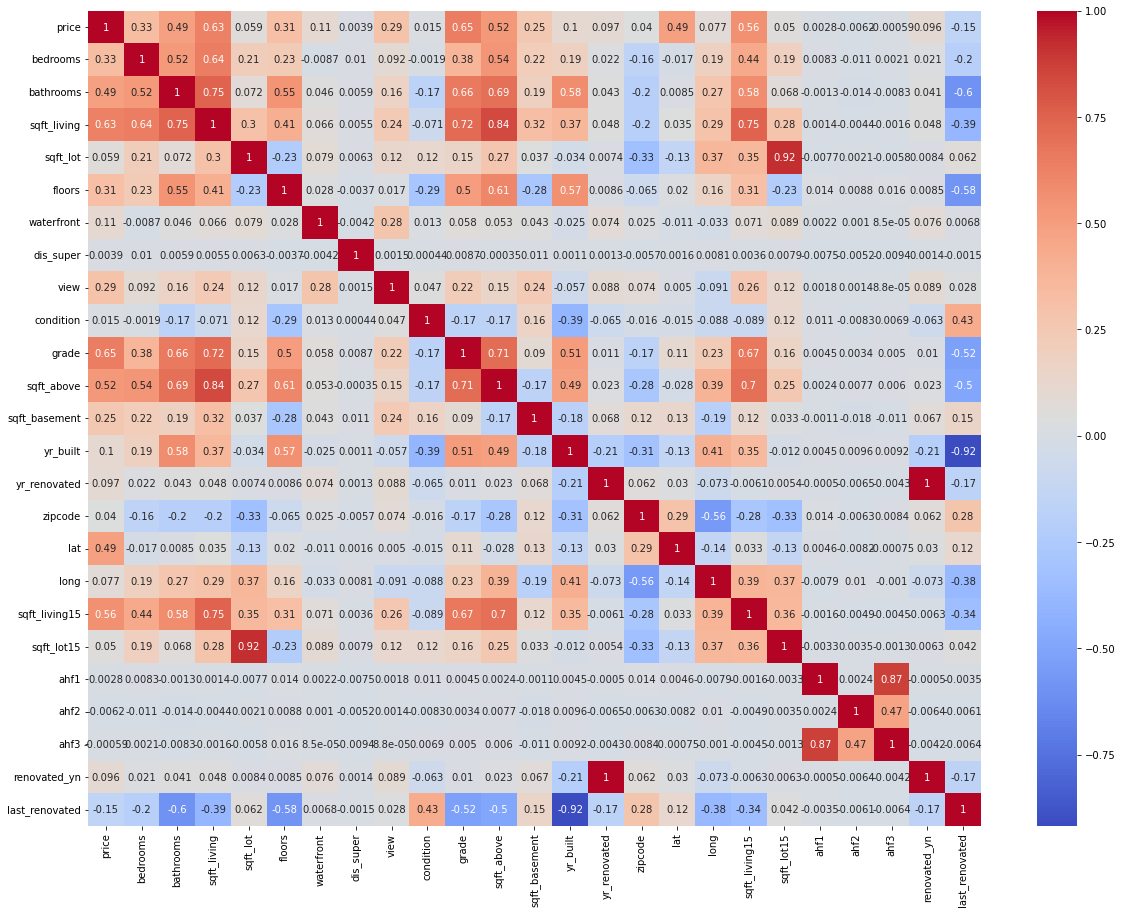

In [30]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap, annot=True)
plt.show()

In [31]:
rel_features =[]
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
print("Relevante Korrelationen:")
for i in ix:
    if corr_fig[i]>= 0.3 or corr_fig[i]<=-0.3:
        rel_features.append(i)
        print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Relevante Korrelationen:
Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6471802272822106
Die Korrelation von sqft_living zum Preis: 0.628917792434783
Die Korrelation von sqft_living15 zum Preis: 0.5637697633773658
Die Korrelation von sqft_above zum Preis: 0.5234665276302366
Die Korrelation von lat zum Preis: 0.4864288718768335
Die Korrelation von bathrooms zum Preis: 0.4850003518906319
Die Korrelation von bedrooms zum Preis: 0.3311092336905619
Die Korrelation von floors zum Preis: 0.3135045254066797


### B) Korrelationen zwischen den Features

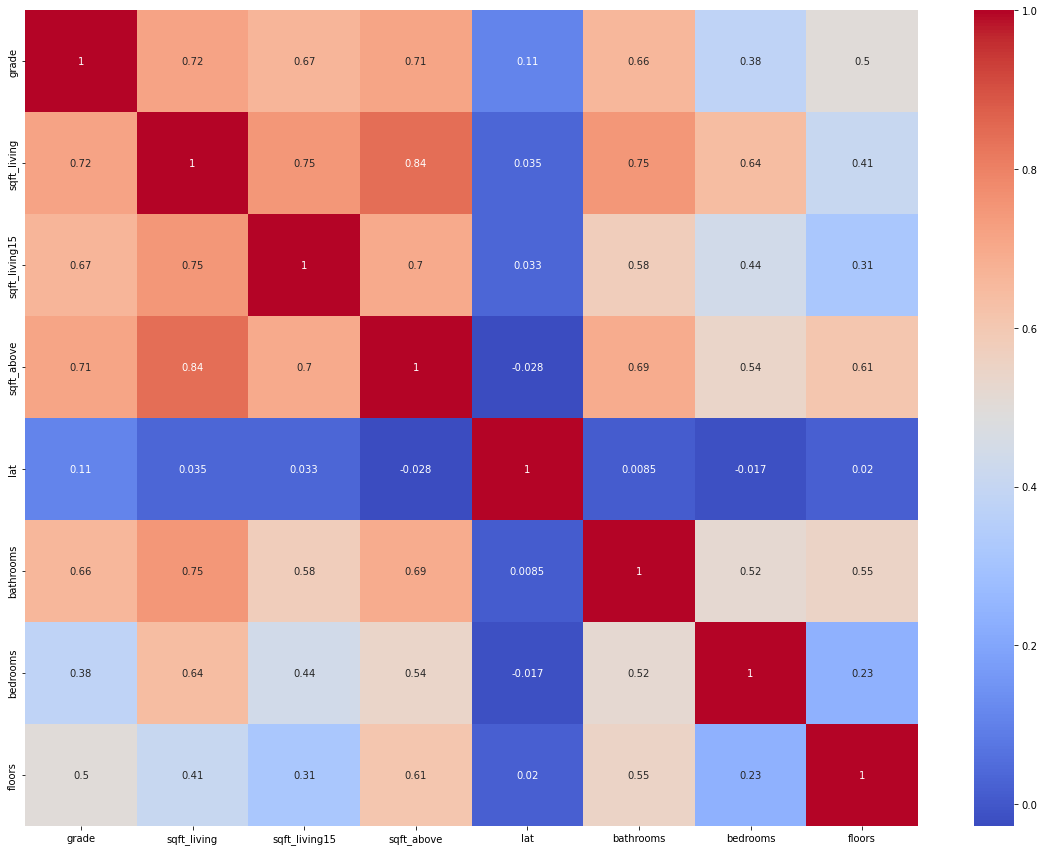

In [32]:
rel_features.remove("price")
corr_rel = corr.loc[rel_features,rel_features]
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr_rel,cmap=cmap, annot=True)
plt.show()

### C) PCA

In [35]:
x=df.loc[:,rel_features]

for num_components in range(1,5):
    pca = decomposition.PCA(n_components=num_components)
    pca.fit(x)
    cumulative_variance= round(pca.explained_variance_ratio_.sum(),2)
    variance_per_pc=pca.explained_variance_ratio_
    print('Number of components: ',num_components,' Variance % explained: ',cumulative_variance,variance_per_pc)

Number of components:  1  Variance % explained:  0.85 [0.84914772]
Number of components:  2  Variance % explained:  0.94 [0.84914772 0.08647679]
Number of components:  3  Variance % explained:  1.0 [0.84914772 0.08647679 0.06437476]
Number of components:  4  Variance % explained:  1.0 [8.49147717e-01 8.64767894e-02 6.43747625e-02 2.83233767e-07]


## Feature Selection

# ToDo List

#### Ausreißer:

- Im Feature **price** sollten alle Zeilen mit den Werten **99999999.0** und **9999999.9** entfernt werden.
- Bei den **restlichen Features** sollten alle Zeilen mit einem **Z-Score** > 10 entfernt werden

#### Missing Values

- Der Datensatz erhalt 3 Zeilen mit NaN Werten, die entfernt werden sollten.

#### Transformation:

- Nach Entfernung der Ausreißer kann der Datensatz einer MinMax-Normalisierung unterzogen werden.
- Die Features **price** und **date** sollten dabei ausgenommen werden.
- Das Feature **yr_renovated** sollte vorher so bearbeitet werden, dass die Lücke zwischen dem Wert 0 und dem kleinsten tatsächlichen Jahr geschlossen wird. So z.B:  
    `df1.yr_renovated = df1.yr_renovated.apply(lambda x: x if x == 0 else x - min_renovation + 1)`